<a href="https://colab.research.google.com/github/JaskarJeyabalan/Churn_Prediction/blob/main/notebook/Churn%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np


Step 2: Load the Customer Dataset

In [ ]:
# Step 2: Load the Customer Dataset
path = '/content/Customer_Data.csv'
df = pd.read_csv(path)
df.sample(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
6164,77653-TEL,Male,37,No,Telangana,3,23,Deal 2,Yes,Yes,...,Credit Card,115.05,7133.45,0.00,0,2284.08,9417.53,Stayed,NaN,NaN
3916,19747-WES,Female,47,No,West Bengal,15,19,Deal 5,Yes,No,...,Bank Withdrawal,64.50,177.40,0.00,60,118.65,356.05,Joined,NaN,NaN
3647,66852-GUJ,Female,35,Yes,Gujarat,12,1,Deal 2,Yes,No,...,Credit Card,74.45,3510.30,0.00,0,163.09,3673.39,Stayed,NaN,NaN
5051,28999-TAM,Female,50,No,Tamil Nadu,3,16,NaN,Yes,Yes,...,Bank Withdrawal,87.65,2766.40,47.87,150,198.40,3066.93,Stayed,NaN,NaN
4581,13361-UTT,Female,59,No,Uttar Pradesh,10,6,Deal 4,Yes,No,...,Credit Card,55.20,864.55,0.00,80,24.45,969.00,Stayed,NaN,NaN


In [ ]:
print("Total Customers: ", len(df))

Total Customers:  6418


In [ ]:
print("Total Row & Columns: ", df.shape)

Total Row & Columns:  (6418, 32)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [ ]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Check Duplicate

In [ ]:
df[df.duplicated()]

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason


In [ ]:
df.drop_duplicates()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6413,43397-UTT,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,...,Credit Card,74.40,896.75,0.00,0,37.96,934.71,Churned,Competitor,Competitor made better offer
6414,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,NaN,...,Credit Card,45.25,3139.80,0.00,0,0.00,3139.80,Stayed,NaN,NaN
6415,78682-KER,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,...,Bank Withdrawal,74.95,2869.85,0.00,0,599.64,3469.49,Churned,Dissatisfaction,Product dissatisfaction
6416,17816-ODI,Male,23,No,Odisha,2,10,NaN,Yes,Yes,...,Credit Card,70.15,4480.70,0.00,0,2107.52,6588.22,Stayed,NaN,NaN


In [ ]:
# Create a copy to preserve original
df2 = df.copy()

# Drop customerID if present
customer_ids = df['Customer_ID']
df.drop('Customer_ID', axis=1, inplace=True)

df.dtypes

,0
Gender,object
Age,int64
Married,object
State,object
Number_of_Referrals,int64
Tenure_in_Months,int64
Value_Deal,object
Phone_Service,object
Multiple_Lines,object
Internet_Service,object


In [ ]:
print(df.dtypes.value_counts())

object     22
float64     5
int64       4
Name: count, dtype: int64


In [ ]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason'],
      dtype='object')

Step 3: Handle Missing Values

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,3548
Phone_Service,0
Multiple_Lines,622
Internet_Service,0


In [ ]:
# Step 3: Handle Missing Values
df = df.fillna({
    'Value_Deal': 'None',
    'Multiple_Lines': 'No',
    'Internet_Type': 'None',
    'Online_Security': 'No',
    'Online_Backup': 'No',
    'Device_Protection_Plan': 'No',
    'Premium_Support': 'No',
    'Streaming_TV': 'No',
    'Streaming_Movies': 'No',
    'Streaming_Music': 'No',
    'Unlimited_Data': 'No',
    'Churn_Category': 'Others',
    'Churn_Reason': 'Others'
})
df.dropna(inplace=True)  # Drop rows with remaining nulls

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,0
Phone_Service,0
Multiple_Lines,0
Internet_Service,0


In [ ]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status',
       'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [ ]:
def print_unique_col_values(df):
  for col in df:
    if df[col].dtypes == 'object':
      print(f'{col}: {df[col].unique()}')
print_unique_col_values(df)

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
State: ['Delhi' 'Maharashtra' 'West Bengal' 'Karnataka' 'Tamil Nadu' 'Telangana'
 'Gujarat' 'Uttar Pradesh' 'Rajasthan' 'Bihar' 'Andhra Pradesh'
 'Madhya Pradesh' 'Chhattisgarh' 'Punjab' 'Jharkhand' 'Haryana'
 'Jammu & Kashmir' 'Assam' 'Uttarakhand' 'Odisha' 'Kerala' 'Puducherry']
Value_Deal: ['None' 'Deal 5' 'Deal 4' 'Deal 1' 'Deal 2' 'Deal 3']
Phone_Service: ['Yes' 'No']
Multiple_Lines: ['No' 'Yes']
Internet_Service: ['Yes' 'No']
Internet_Type: ['Cable' 'Fiber Optic' 'DSL' 'None']
Online_Security: ['No' 'Yes']
Online_Backup: ['Yes' 'No']
Device_Protection_Plan: ['No' 'Yes']
Premium_Support: ['Yes' 'No']
Streaming_TV: ['Yes' 'No']
Streaming_Movies: ['No' 'Yes']
Streaming_Music: ['No' 'Yes']
Unlimited_Data: ['Yes' 'No']
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer_Status: ['Stayed' 'Churned' 'Joined']
Churn_Category: ['Others' '

In [ ]:
yes_no_cols = [col for col in df.columns if df[col].nunique() == 2]
yes_no_cols

['Gender',
 'Married',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection_Plan',
 'Premium_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Streaming_Music',
 'Unlimited_Data',
 'Paperless_Billing']

Exploratory Data Analysis (EDA)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve original
df_encoded = df.copy()

# Encode binary categorical columns
binary_cols = [
    'Gender','Married','Phone_Service','Multiple_Lines','Internet_Service',
    'Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support',
    'Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Paperless_Billing'
]
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Encode target separately
df_encoded['Customer_Status_Churned'] = df_encoded['Customer_Status'].apply(lambda x: 1 if x == 'Churned' else 0)

# Drop ID + leakage columns before encoding
df_encoded = df_encoded.drop(['Churn_Category', 'Customer_Status','Churn_Reason'], axis = 'columns', errors='ignore')

# One-hot encode remaining categorical columns
remaining_cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_encoded, columns=remaining_cat_cols, drop_first=True)

# Split dataset
def split_dataset(df_encoded, target_column='Customer_Status_Churned', drop_columns=None, test_size=0.2, random_state=42):
    X = df_encoded.drop(drop_columns, axis = 'columns')
    y = df_encoded[target_column]  # target as Series
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Example usage
X_train, X_test, y_train, y_test = split_dataset(
    df_encoded,
    drop_columns=['Customer_Status_Churned']
)


In [ ]:
df_encoded.columns

Index(['Gender', 'Age', 'Married', 'Number_of_Referrals', 'Tenure_in_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Paperless_Billing',
       'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status_Churned', 'State_Assam',
       'State_Bihar', 'State_Chhattisgarh', 'State_Delhi', 'State_Gujarat',
       'State_Haryana', 'State_Jammu & Kashmir', 'State_Jharkhand',
       'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Odisha', 'State_Puducherry', 'State_Punjab',
       'State_Rajasthan', 'State_Tamil Nadu', 'State_Telangana',
       'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal',
       'Value_Deal_Deal 2', 'Value_Deal_Deal 3

In [ ]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)
df_encoded.sample(5)

,Gender,Age,Married,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Value_Deal_Deal 4,Value_Deal_Deal 5,Value_Deal_None,Internet_Type_DSL,Internet_Type_Fiber Optic,Internet_Type_None,Contract_One Year,Contract_Two Year,Payment_Method_Credit Card,Payment_Method_Mailed Check
428,0,42,1,0,4,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
1199,0,65,1,10,34,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2514,1,49,0,12,17,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4831,0,84,0,11,22,1,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
6031,0,45,1,10,3,1,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [ ]:
df_encoded.dtypes

,0
Gender,int64
Age,int64
Married,int64
Number_of_Referrals,int64
Tenure_in_Months,int64
Phone_Service,int64
Multiple_Lines,int64
Internet_Service,int64
Online_Security,int64
Online_Backup,int64


In [ ]:
for col in df_encoded:
  print(f'{col}: {df_encoded[col].unique()}')

Gender: [1 0]
Age: [35 45 51 79 80 24 66 63 41 48 26 56 36 38 53 47 67 74 64 78 29 18 31 34
 44 69 49 22 46 30 32 52 61 25 54 73 28 68 65 21 58 27 42 20 72 50 59 57
 81 76 55 77 39 23 83 19 70 40 60 33 43 62 71 82 75 37 84 85]
Married: [0 1]
Number_of_Referrals: [ 7 14  4  3  9 12  0  6 15  8  1  5 13  2 10 11]
Tenure_in_Months: [27 13 35 21  8  2 23 24 10  1 22 26  6 19  4 30 33 12 20  7 18  3 16 31
 25 14 28 29 34 36 32 17  5 15 11  9]
Phone_Service: [1 0]
Multiple_Lines: [0 1]
Internet_Service: [1 0]
Online_Security: [0 1]
Online_Backup: [1 0]
Device_Protection_Plan: [0 1]
Premium_Support: [1 0]
Streaming_TV: [1 0]
Streaming_Movies: [0 1]
Streaming_Music: [0 1]
Unlimited_Data: [1 0]
Paperless_Billing: [1 0]
Monthly_Charge: [65.6  -4.   73.9  ... 48.85 67.05 64.1 ]
Total_Charges: [ 593.3   542.4   280.85 ... 3139.8  2869.85 4480.7 ]
Total_Refunds: [ 0.   38.33 21.25 30.53 44.42 44.9  12.26  6.11 10.23 13.03 36.02 17.91
  1.01 16.99 25.24 27.01  9.73 44.53 38.46 16.56 18.88  8.13  8.7

In [ ]:
df_encoded.shape


(6418, 57)

In [ ]:
X_train.shape

(5134, 56)

In [ ]:
X_test.shape

(1284, 56)

In [ ]:
X_train[:5]

,Gender,Age,Married,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Value_Deal_Deal 4,Value_Deal_Deal 5,Value_Deal_None,Internet_Type_DSL,Internet_Type_Fiber Optic,Internet_Type_None,Contract_One Year,Contract_Two Year,Payment_Method_Credit Card,Payment_Method_Mailed Check
4584,0,66,0,10,12,1,1,1,0,1,...,False,False,False,False,True,False,False,False,False,False
2197,0,56,1,3,36,1,1,1,0,0,...,False,False,True,False,True,False,False,False,False,False
1741,0,55,1,13,26,1,0,1,0,0,...,True,False,False,True,False,False,True,False,False,False
748,0,63,0,6,3,1,0,1,1,1,...,False,False,True,False,True,False,True,False,True,False
1789,1,39,0,8,28,1,0,1,1,0,...,False,False,False,False,True,False,False,True,True,False


In [ ]:
print("X_train Columns:", len(X_train.columns))

X_train Columns: 56


Step 4: Visualize Churn Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create derived columns

df2['Churn Status'] = df2['Customer_Status'].apply(lambda x: 1 if x == 'Churned' else 0)
df2['Age Group'] = df2['Age'].apply(
    lambda x: '<20' if x < 20 else '20-35' if x < 35 else '35-50' if x < 50 else '>50'
)

df2['Tenure Group'] = df2['Tenure_in_Months'].apply(
    lambda x: '< 6 Months' if x < 6 else '6-12 Months' if x < 12 else '12-18 Months' if x < 18 else '18-24 Months' if x < 24 else '24-30 Months' if x < 30 else '>= 30 Months'
)

df2['Monthly Charge Status'] = df2['Monthly_Charge'].apply(
    lambda x: '<20' if x < 20 else '20-50' if x < 50 else '50-100' if x < 100 else '>100'
)

df2['Total Charges Range'] = df2['Total_Charges'].apply(
    lambda x: '<1k' if x < 1000 else
              '1k-4k' if x < 4000 else
              '4k-8k' if x < 8000 else
              '>8k'
)

df2['Total Revenue Range'] = df2['Total_Revenue'].apply(
    lambda x: '<1k' if x < 1000 else
              '1k-5k' if x < 5000 else
              '5k-10k' if x < 10000 else
              '>10k'
)

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
# Total Customers
total_customers = df2['Customer_ID'].nunique()

# New Joiners
new_joiners = df2[df2['Customer_Status'] == 'Joined']['Customer_ID'].nunique()

# Total Churn
total_churn = df2['Churn Status'].sum()

# Churn Rate (%)
churn_rate = (total_churn / total_customers) * 100

# Display as a summary table
summary_table = pd.DataFrame({
    'Metric': ['Total Customers', 'New Joiners', 'Total Churn', 'Churn Rate (%)'],
    'Value': [total_customers, new_joiners, total_churn, round(churn_rate, 2)]
})
summary_table.to_excel('summary_table.xlsx', index=False)

print(summary_table)


            Metric    Value
0  Total Customers  6418.00
1      New Joiners   411.00
2      Total Churn  1732.00
3   Churn Rate (%)    26.99


/tmp/ipython-input-2330627518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['skyblue','salmon', 'lightcoral'])


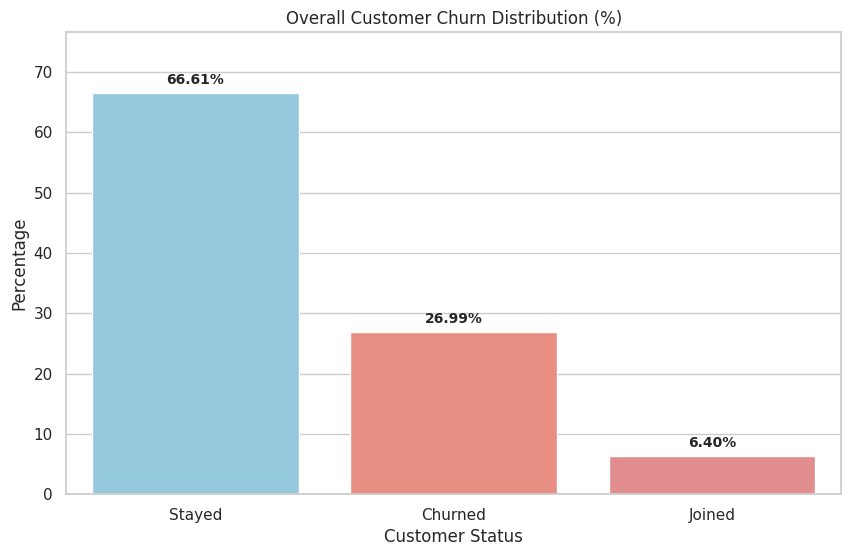

In [ ]:
# === Churn Distribution (Overall, with % labels) ===
# Calculate churn distribution percentages
churn_counts = df2['Customer_Status'].value_counts(normalize=True) * 100

# Plot as bar chart
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['skyblue','salmon', 'lightcoral'])

# Add bar labels (percentages)
for i, val in enumerate(churn_counts.values):
    ax.text(i, val + 1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Overall Customer Churn Distribution (%)")
plt.xlabel("Customer Status")
plt.ylabel("Percentage")
plt.ylim(0, max(churn_counts.values) + 10)  # add space for labels
plt.show()


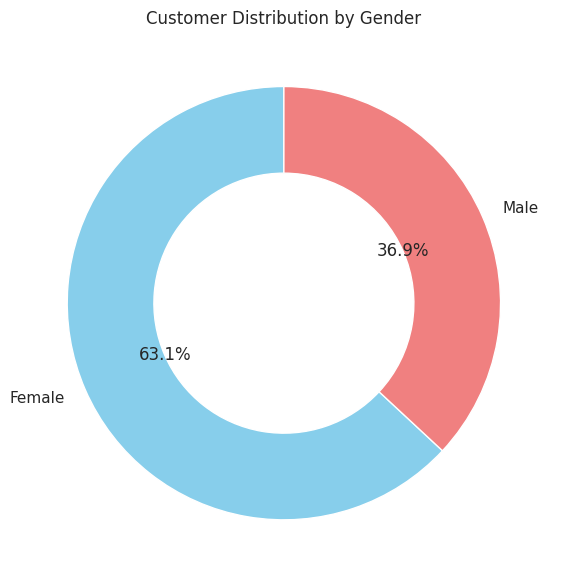

In [ ]:
# === Gender Distribution ===
# Donut Chart: Customer Distribution by Gender
gender_counts = df2['Gender'].value_counts()

# Plot
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],  # adjust as you like
    wedgeprops={'width':0.4}           # this makes it a donut
)

plt.title("Customer Distribution by Gender")
plt.tight_layout()
plt.show()


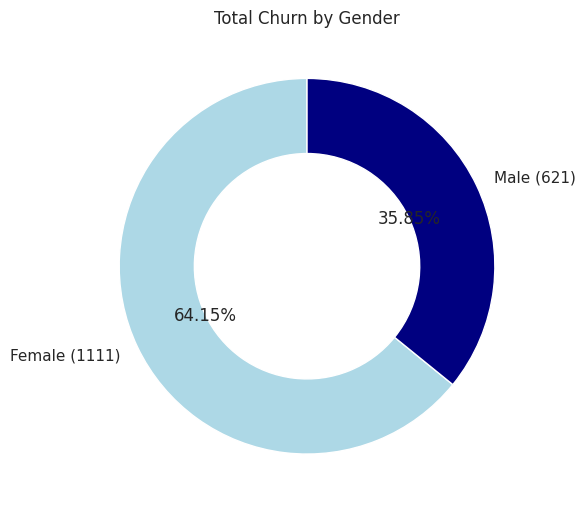

In [ ]:
# Assuming total_churn is already defined
# Step 1: Get churned counts by gender
churn_by_gender = df2.groupby('Gender')['Churn Status'].sum()

# Step 2: Plot donut chart
plt.figure(figsize=(6,6))
plt.pie(
    churn_by_gender,
    labels=[f"{gender} ({int(count)})" for gender, count in churn_by_gender.items()],
    autopct=lambda pct: f"{pct:.2f}%",
    startangle=90,
    colors=['lightblue', 'navy'],
    wedgeprops={'width': 0.4}
)

plt.title("Total Churn by Gender")
plt.tight_layout()
plt.show()


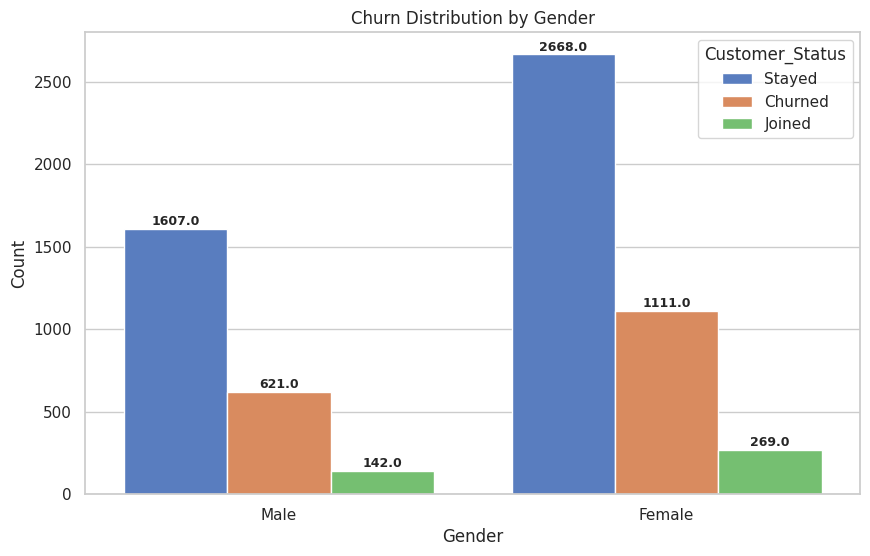

In [ ]:
# Countplot of churn by gender
ax = sns.countplot(x='Gender', hue='Customer_Status', data=df2)

# Add bar labels (counts or percentages)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.text(p.get_x() + p.get_width()/2, height + 5,   # position above bar
            f'{height}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


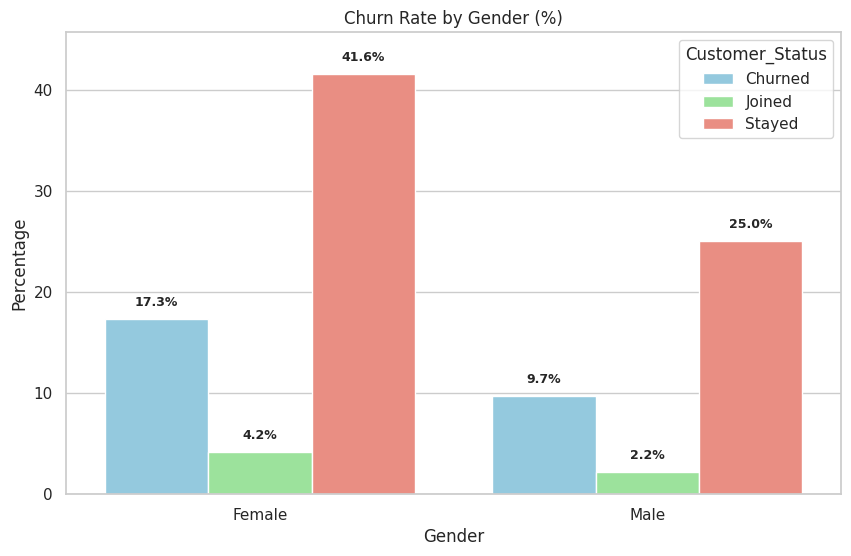

In [ ]:
# Calculate percentages
gender_churn = df2.groupby(['Gender','Customer_Status']).size().reset_index(name='Count')
gender_churn['Percent'] = gender_churn['Count'] / gender_churn['Count'].sum() * 100

# Plot percentages
ax = sns.barplot(x='Gender', y='Percent', hue='Customer_Status', data=gender_churn, palette=['skyblue', 'lightgreen', 'salmon'])

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.text(p.get_x() + p.get_width()/2, height + 1,
              f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Churn Rate by Gender (%)")
plt.ylabel("Percentage")
# Increase top edge by 5% above the tallest bar
max_height = gender_churn['Percent'].max()
ax.set_ylim(0, max_height * 1.10)
plt.show()


/tmp/ipython-input-1746714554.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df2.groupby('Age Group')


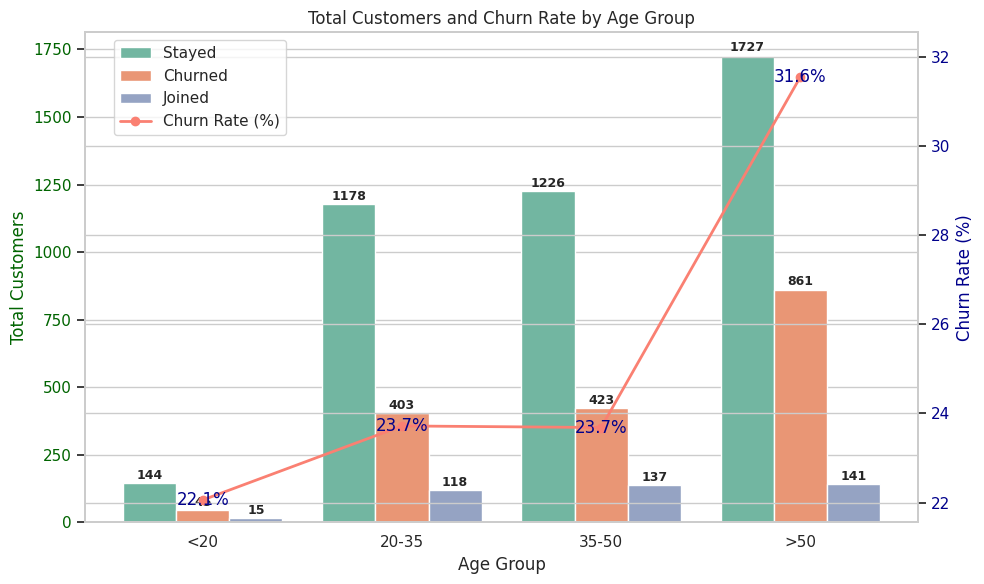

In [ ]:
# Step 1: Create Age Group column (based on mapping_AgeGrp logic)
df2['Age Group'] = pd.cut(
    df2['Age'],
    bins=[0, 20, 35, 50, 120],
    labels=['<20', '20-35', '35-50', '>50']
)

# Step 2: Aggregate metrics
age_grouped = df2.groupby('Age Group')
total_customers = age_grouped['Customer_ID'].nunique()
churned_customers = age_grouped['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 3: Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart: Total Customers
sns.countplot(
    x='Age Group',
    hue='Customer_Status',
    data=df2,
    order=['<20', '20-35', '35-50', '>50'],
    palette='Set2',
    ax=ax1
)
plt.legend().remove()  # Remove legend from countplot

ax1.set_ylabel('Total Customers', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Add bar labels
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

# Line chart: Churn Rate
ax2 = ax1.twinx()
ax2.plot(
    churn_rate.index,
    churn_rate.values,
    color='salmon',
    marker='o',
    linewidth=2,
    label='Churn Rate (%)'
)
ax2.set_ylabel('Churn Rate (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.set_ylim(min(churn_rate.values) - 0.5, max(churn_rate.values) + 1)

# Add line labels
for i, (x, y) in enumerate(zip(churn_rate.index, churn_rate.values)):
    ax2.text(i, y + 0.2, f'{y:.1f}%', ha='center', va='top', color='darkblue')

# Title and legend
plt.title("Total Customers and Churn Rate by Age Group")
fig.legend(loc='upper right', bbox_to_anchor=(0.25,1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


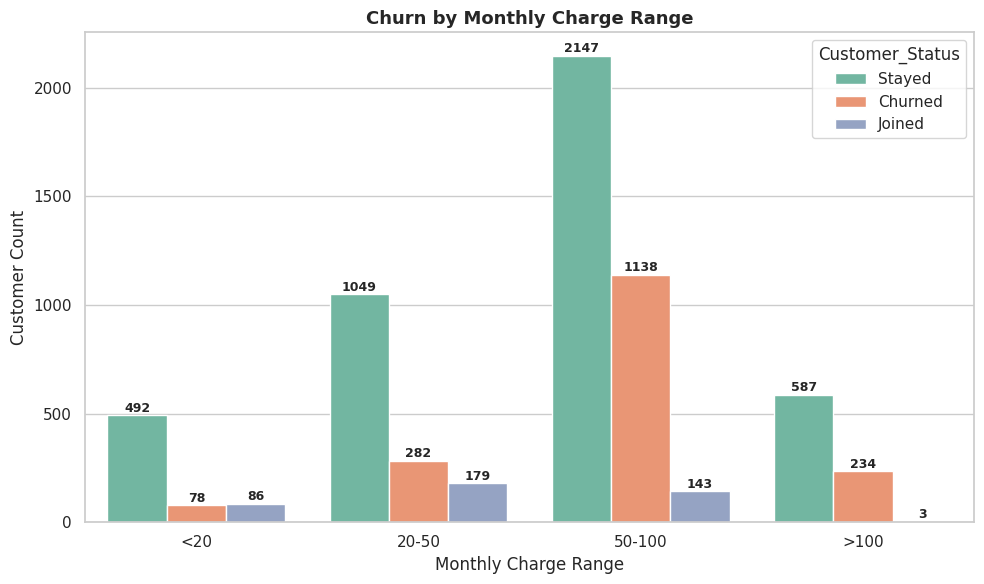

In [ ]:
# === Churn by Monthly Charge Status ===
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Monthly Charge Status',
    hue='Customer_Status',
    data=df2,
    order=['<20','20-50','50-100','>100'],
    palette='Set2'
)

# Add bar labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 3,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.title("Churn by Monthly Charge Range", fontsize=13, fontweight='bold')
plt.xlabel("Monthly Charge Range")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


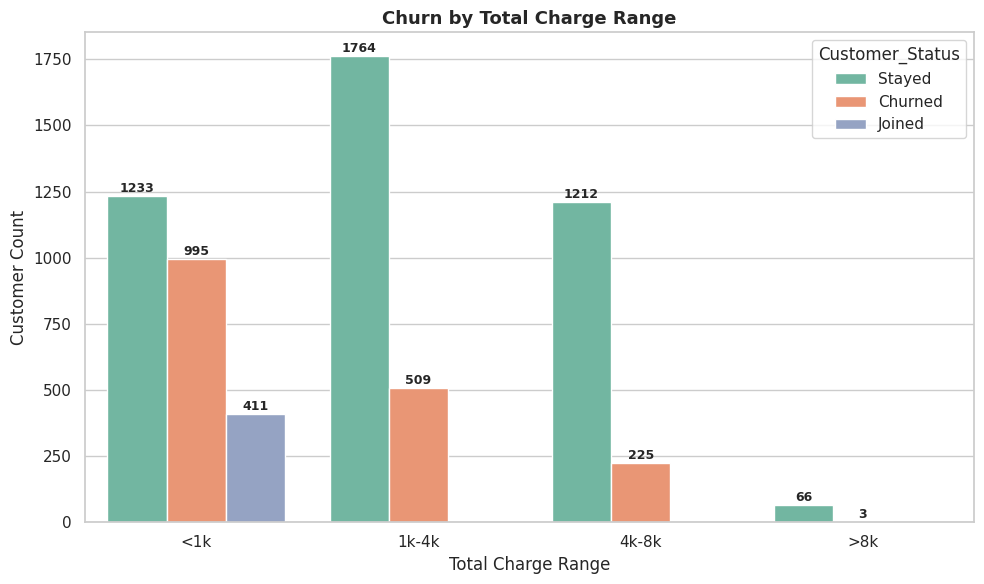

In [ ]:
# === Churn by Total Charges Range ===
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Total Charges Range',
    hue='Customer_Status',
    data=df2,
    order=['<1k', '1k-4k', '4k-8k', '>8k'],
    palette='Set2'
)

# Add bar labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 3,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.title("Churn by Total Charge Range", fontsize=13, fontweight='bold')
plt.xlabel("Total Charge Range")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


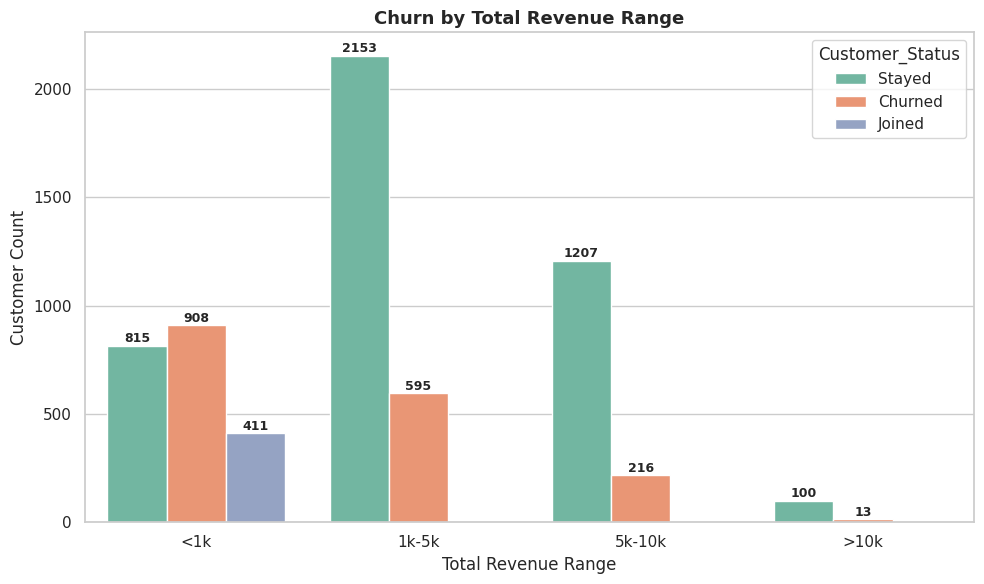

In [ ]:
# Step 1: Plot grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Total Revenue Range',
    hue='Customer_Status',
    data=df2,
    order=['<1k', '1k-5k', '5k-10k', '>10k'],
    palette='Set2'
)

# Step 2: Add bar labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 3,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

# Step 3: Styling
plt.title("Churn by Total Revenue Range", fontsize=13, fontweight='bold')
plt.xlabel("Total Revenue Range")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


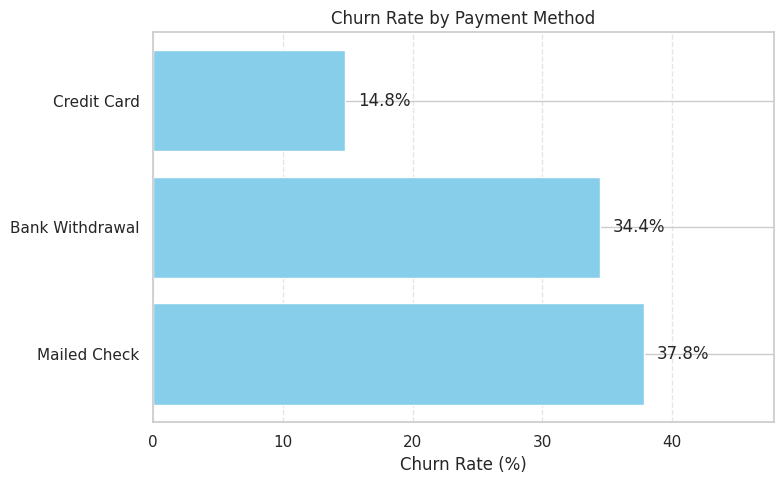

In [ ]:
# Step 1: Calculate churn rate by payment method
payment_group = df2.groupby('Payment_Method')
total_customers = payment_group['Customer_ID'].nunique()
churned_customers = payment_group['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 2: Prepare DataFrame
plot_df = pd.DataFrame({
    'Payment Method': total_customers.index,
    'Churn Rate (%)': churn_rate.values
}).sort_values('Churn Rate (%)', ascending=False)

# Step 3: Plot horizontal clustered bar chart
plt.figure(figsize=(8,5))
bars = plt.barh(
    plot_df['Payment Method'],
    plot_df['Churn Rate (%)'],
    color='skyblue'
)

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

# Styling
plt.xlabel("Churn Rate (%)")
plt.title("Churn Rate by Payment Method")
plt.xlim(0, max(plot_df['Churn Rate (%)']) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


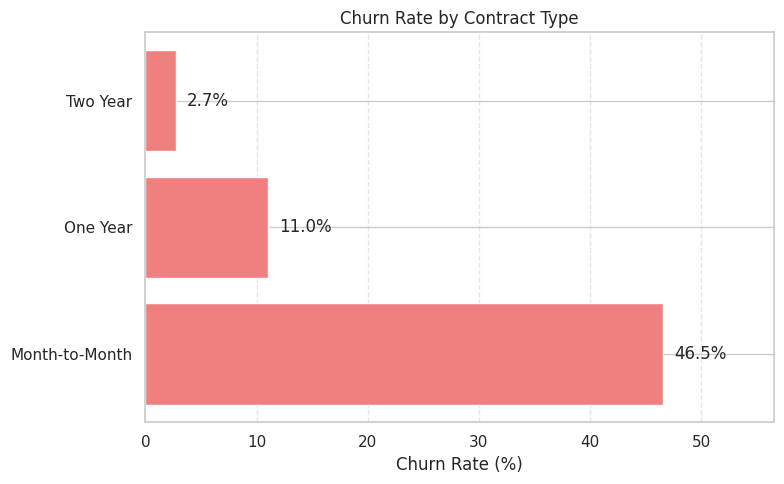

In [ ]:
# Step 1: Calculate churn rate by contract type
contract_group = df2.groupby('Contract')
total_customers = contract_group['Customer_ID'].nunique()
churned_customers = contract_group['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 2: Prepare DataFrame
plot_df = pd.DataFrame({
    'Contract Type': total_customers.index,
    'Churn Rate (%)': churn_rate.values
}).sort_values('Churn Rate (%)', ascending=False)

# Step 3: Plot horizontal bar chart
plt.figure(figsize=(8,5))
bars = plt.barh(
    plot_df['Contract Type'],
    plot_df['Churn Rate (%)'],
    color='lightcoral'
)

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

# Styling
plt.xlabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.xlim(0, max(plot_df['Churn Rate (%)']) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-183380590.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_grouped = df2.groupby('Tenure Group')


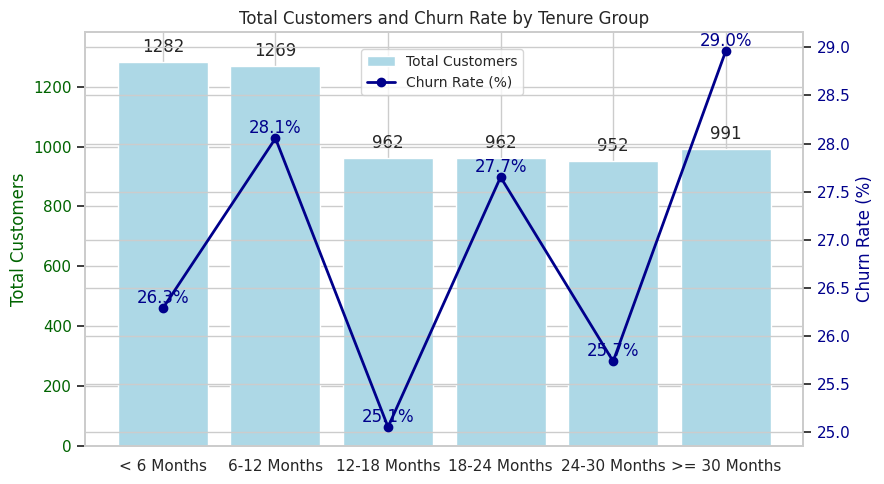

In [ ]:
# Step 1: Create Tenure Group column (based on mapping_TenureGrp logic)
df2['Tenure Group'] = pd.cut(
    df2['Tenure_in_Months'],
    bins=[0, 6, 12, 18, 24, 30, df2['Tenure_in_Months'].max()],
    labels=['< 6 Months', '6-12 Months', '12-18 Months',
            '18-24 Months', '24-30 Months', '>= 30 Months']
)

# Step 2: Aggregate metrics
tenure_grouped = df2.groupby('Tenure Group')
total_customers = tenure_grouped['Customer_ID'].nunique()
churned_customers = tenure_grouped['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 3: Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(9,5))

# Bar chart: Total Customers
bars = ax1.bar(
    total_customers.index,
    total_customers.values,
    color='lightblue',
    label='Total Customers'
)
ax1.set_ylabel('Total Customers', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
# After plotting bars
ax1.set_ylim(0, max(total_customers.values) + 100)  # or +50 for tighter fit

# Add bar labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 20, f'{int(height)}', ha='center', va='bottom')

# Line chart: Churn Rate
ax2 = ax1.twinx()
ax2.plot(
    churn_rate.index,
    churn_rate.values,
    color='darkblue',
    marker='o',
    linewidth=2,
    label='Churn Rate (%)'
)
ax2.set_ylabel('Churn Rate (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Add line labels
for i, (x, y) in enumerate(zip(churn_rate.index, churn_rate.values)):
    ax2.text(i, y + 0.2, f'{y:.1f}%', ha='center', va='top', color='darkblue')

# Title and legend
plt.title("Total Customers and Churn Rate by Tenure Group")
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90), fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3253901698.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_grouped = df2.groupby('Tenure Group')


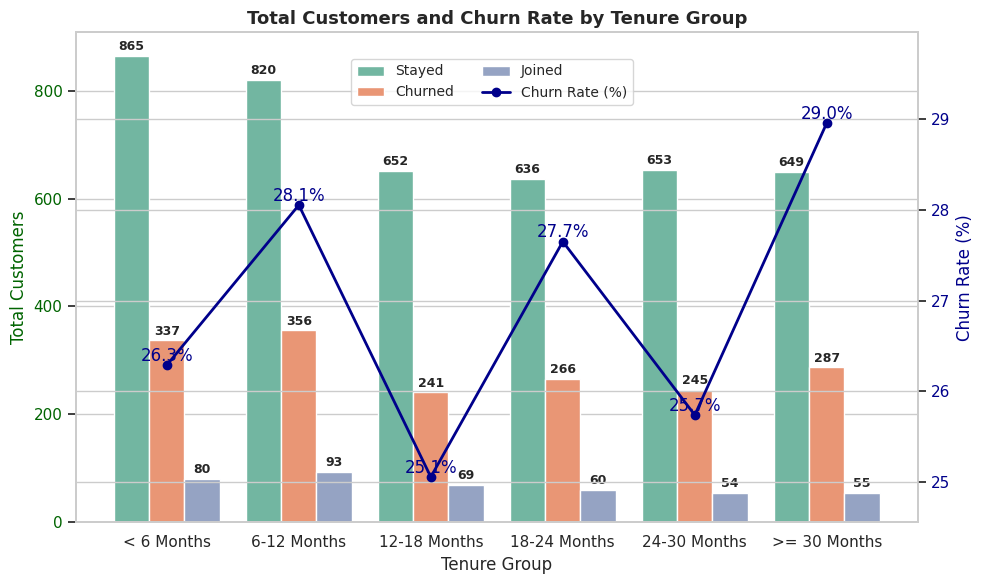

In [ ]:
# Step 1: Aggregate metrics
tenure_grouped = df2.groupby('Tenure Group')
total_customers = tenure_grouped['Customer_ID'].nunique()
churned_customers = tenure_grouped['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 2: Define tenure order
tenure_order = ['< 6 Months','6-12 Months','12-18 Months','18-24 Months','24-30 Months','>= 30 Months']
total_customers = total_customers.reindex(tenure_order).dropna()
churn_rate = churn_rate.reindex(tenure_order).dropna()

# Step 3: Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Countplot on ax1
sns.countplot(
    x='Tenure Group',
    hue='Customer_Status',
    data=df2,
    order=tenure_order,
    palette='Set2',
    ax=ax1
)
plt.legend().remove()  # Remove legend from countplot

# Add bar labels
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

ax1.set_ylabel('Total Customers', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Line chart on ax2
ax2 = ax1.twinx()
ax2.plot(
    churn_rate.index,
    churn_rate.values,
    color='darkblue',
    marker='o',
    linewidth=2,
    label='Churn Rate (%)'
)
ax2.set_ylabel('Churn Rate (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
ax2.set_ylim(min(churn_rate.values) - 0.5, max(churn_rate.values) + 1)

# Add line labels
for i, (x, y) in enumerate(zip(churn_rate.index, churn_rate.values)):
    ax2.text(i, y + 0.2, f'{y:.1f}%', ha='center', va='top', color='darkblue')

# Title and legend
plt.title("Total Customers and Churn Rate by Tenure Group", fontsize=13, fontweight='bold')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.90), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()


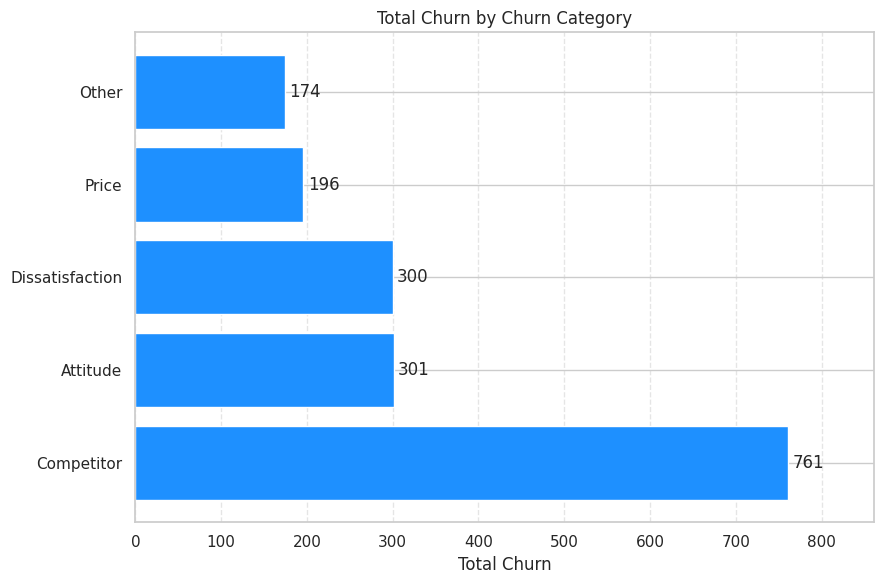

In [ ]:
# Step 1: Filter out 'Other' from Churn_Category
filtered_df = df2[df2['Churn_Category'] != 'Others']

# Step 2: Group and calculate total churn
category_group = filtered_df.groupby('Churn_Category')
total_churn = category_group['Churn Status'].sum()

# Step 3: Prepare DataFrame
plot_df = pd.DataFrame({
    'Churn Category': total_churn.index,
    'Total Churn': total_churn.values
}).sort_values('Total Churn', ascending=False)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(9,6))
bars = plt.barh(
    plot_df['Churn Category'],
    plot_df['Total Churn'],
    color='dodgerblue'
)

# Add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

# Styling
plt.xlabel("Total Churn")
plt.title("Total Churn by Churn Category")
plt.xlim(0, max(plot_df['Total Churn']) + 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


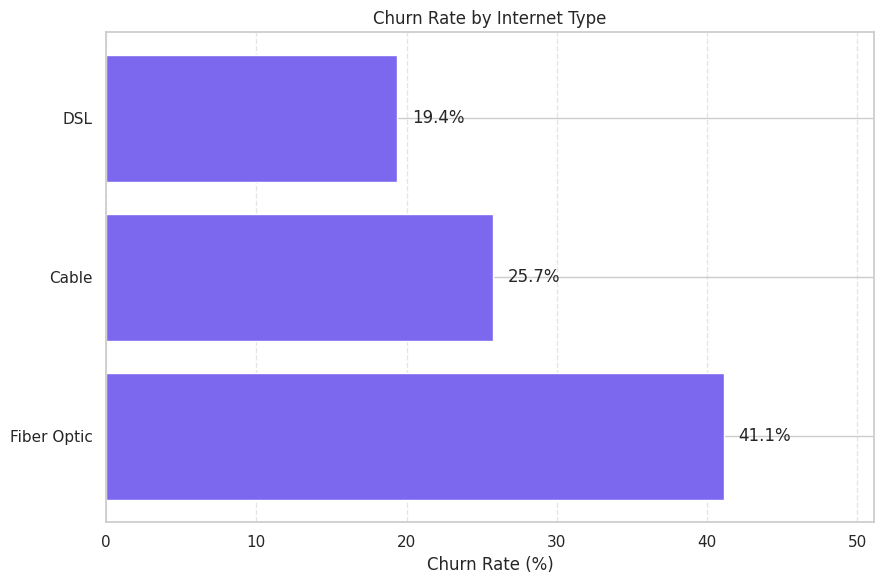

In [ ]:
# Step 1: Group by Internet_Type and calculate churn rate
internet_group = df2.groupby('Internet_Type')
total_customers = internet_group['Customer_ID'].nunique()
churned_customers = internet_group['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 2: Create DataFrame and sort by churn rate
plot_df = pd.DataFrame({
    'Internet Type': total_customers.index,
    'Churn Rate (%)': churn_rate.values
}).sort_values('Churn Rate (%)', ascending=False)

# Step 3: Plot horizontal bar chart
plt.figure(figsize=(9,6))
bars = plt.barh(
    plot_df['Internet Type'],
    plot_df['Churn Rate (%)'],
    color='mediumslateblue'
)

# Add percentage labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

# Styling
plt.xlabel("Churn Rate (%)")
plt.title("Churn Rate by Internet Type")
plt.xlim(0, max(plot_df['Churn Rate (%)']) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


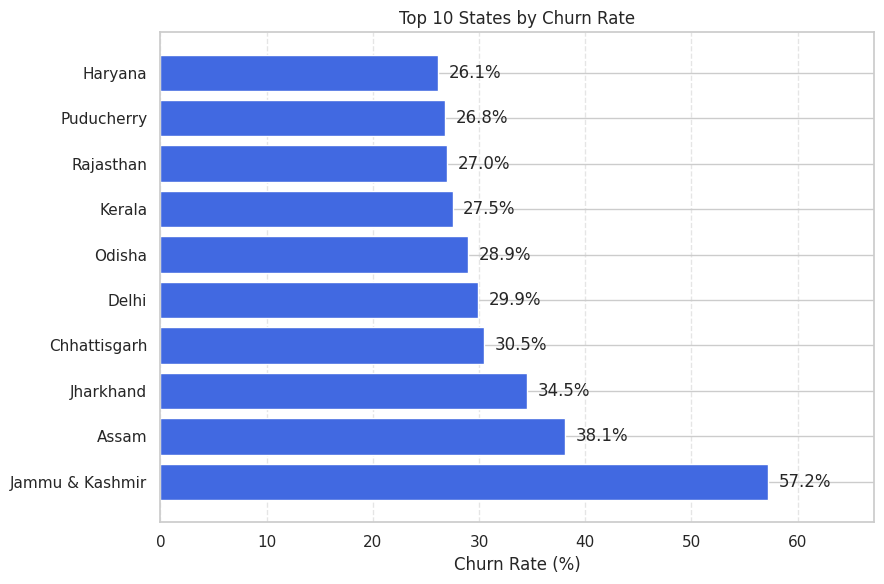

In [ ]:
# Step 1: Group by State and calculate churn rate
state_group = df2.groupby('State')
total_customers = state_group['Customer_ID'].nunique()
churned_customers = state_group['Churn Status'].sum()
churn_rate = churned_customers / total_customers * 100

# Step 2: Create DataFrame and sort by churn rate
plot_df = pd.DataFrame({
    'State': total_customers.index,
    'Churn Rate (%)': churn_rate.values
}).sort_values('Churn Rate (%)', ascending=False).head(10)

# Step 3: Plot horizontal bar chart
plt.figure(figsize=(9,6))
bars = plt.barh(
    plot_df['State'],
    plot_df['Churn Rate (%)'],
    color='royalblue'
)

# Add percentage labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center')

# Styling
plt.xlabel("Churn Rate (%)")
plt.title("Top 10 States by Churn Rate")
plt.xlim(0, max(plot_df['Churn Rate (%)']) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


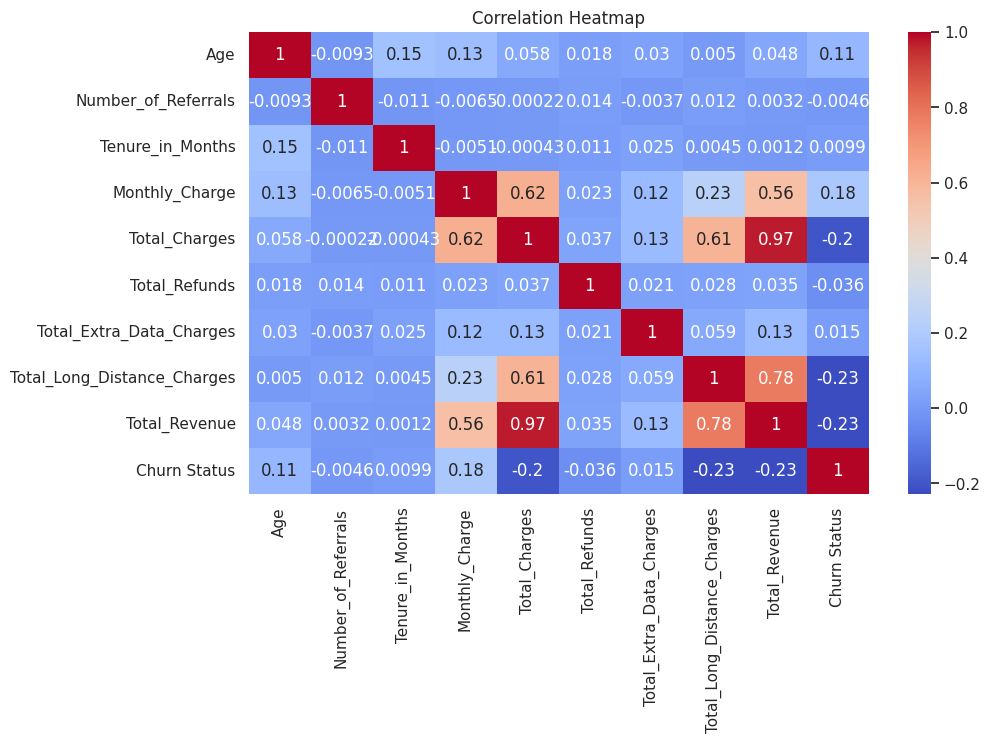

In [ ]:
# === Correlation Heatmap ===
numeric_cols = df2.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# === prod_Services ===
id_cols = ["Customer_ID","Gender","Age","Married","State","Number_of_Referrals","Tenure_in_Months",
            "Value_Deal","Internet_Type","Contract","Payment_Method","Monthly_Charge","Total_Charges",
            "Total_Refunds","Total_Extra_Data_Charges","Total_Long_Distance_Charges","Total_Revenue",
            "Customer_Status","Churn_Category","Churn_Reason","Churn Status","Monthly Charge Status"]

prod_Services = df2.melt(
    id_vars=id_cols,
    var_name="Services",
    value_name="Status"
)


In [ ]:
# Step 1: Filter churned customers only
churned = prod_Services[prod_Services['Churn Status'] == 1]

# Step 1.5: Keep only 'Yes' and 'No' statuses
churned = churned[churned['Status'].isin(['Yes', 'No'])]

# Step 2: Count churned customers by service and status
churn_counts = (
    churned.groupby(['Services', 'Status'])
    .size()
    .unstack(fill_value=0)
)

# Step 3: Convert to percentage
churn_pct = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
churn_pct = churn_pct.round(1)

# Step 4: Display matrix
print("🔹 Churned Customers by Service Subscription Status (%):")
print(churn_pct)

churn_pct.to_excel("churn_pct.xlsx")


🔹 Churned Customers by Service Subscription Status (%):
Status                    No   Yes
Services                          
Device_Protection_Plan  69.1  30.9
Internet_Service         6.3  93.7
Multiple_Lines          50.1  49.9
Online_Backup           70.0  30.0
Online_Security         83.6  16.4
Paperless_Billing       25.4  74.6
Phone_Service            9.4  90.6
Premium_Support         82.4  17.6
Streaming_Movies        53.0  47.0
Streaming_Music         58.5  41.5
Streaming_TV            53.9  46.1
Unlimited_Data          14.5  85.5


/tmp/ipython-input-1616431934.py:38: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


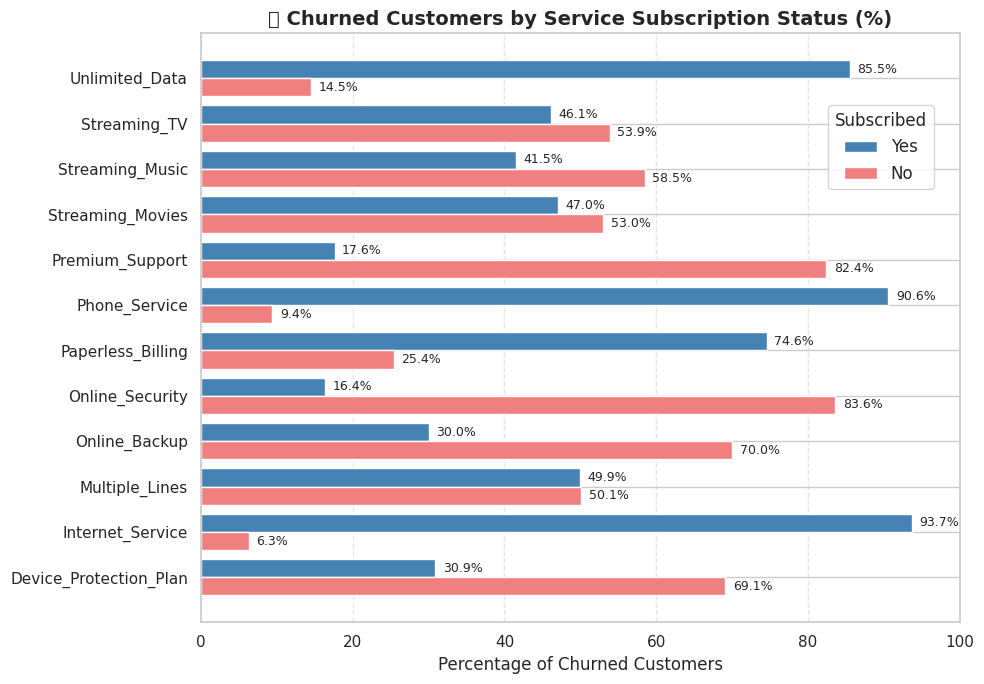

In [ ]:
# Sort alphabetically
churn_pct = churn_pct.sort_index()

# Prepare data
services = churn_pct.index.tolist()
yes_vals = churn_pct['Yes'].values
no_vals = churn_pct['No'].values
y_pos = np.arange(len(services))

# Plot side-by-side bars
bar_width = 0.4
fig, ax = plt.subplots(figsize=(10, 7))

bars_yes = ax.barh(y_pos + bar_width/2, yes_vals, height=bar_width, color='steelblue', label='Yes')
bars_no = ax.barh(y_pos - bar_width/2, no_vals, height=bar_width, color='lightcoral', label='No')

# Add percentage labels
for i in range(len(services)):
  ax.text(yes_vals[i] + 1, y_pos[i] + bar_width/2, f'{yes_vals[i]:.1f}%', va='center', fontsize=9)
  ax.text(no_vals[i] + 1, y_pos[i] - bar_width/2, f'{no_vals[i]:.1f}%', va='center', fontsize=9)

# Styling
ax.set_yticks(y_pos)
ax.set_yticklabels(services)
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage of Churned Customers")
ax.set_title("🔹 Churned Customers by Service Subscription Status (%)", fontsize=14, fontweight='bold')
fig.legend(
    title="Subscribed",
    loc='upper right',
    bbox_to_anchor=(0.95, 0.85),  # current position
    bbox_transform=fig.transFigure,
    fontsize=12,
    frameon=True
)

ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


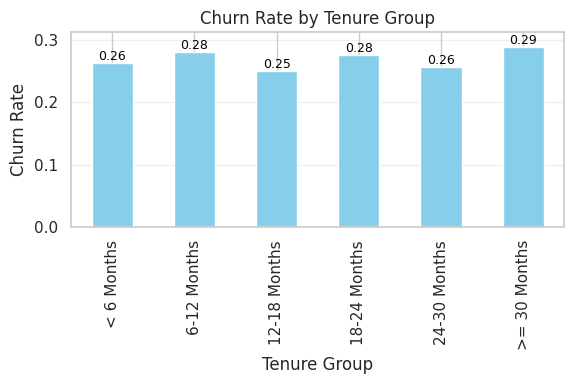

Churn Rate by Tenure Group:
 Tenure_Months_Group
< 6 Months      0.262871
6-12 Months     0.280536
12-18 Months    0.250520
18-24 Months    0.276507
24-30 Months    0.257353
>= 30 Months    0.289606
Name: Customer_Status_Churned, dtype: float64
Estimated Monthly Savings by Tenure Group (group-specific lifts):
< 6 Months   ₹8,160.30
6-12 Months  ₹8,077.55
12-18 Months ₹6,123.41
18-24 Months ₹6,123.41
24-30 Months ₹6,059.75
>= 30 Months ₹6,308.00

Total Estimated Monthly Savings: ₹40,852.41


/tmp/ipython-input-3410373744.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby('Tenure_Months_Group')


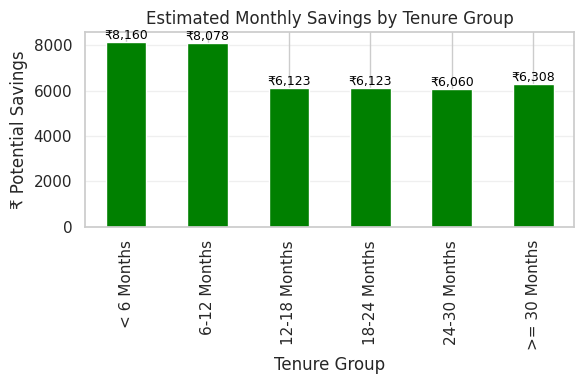

In [ ]:
# Customer Segmentation & Savings Analysis

df_encoded['Tenure_Months_Group'] = df2['Tenure Group']

# Churn Rate by Tenure Group
segment_churn = df_encoded.groupby('Tenure_Months_Group', observed=False)['Customer_Status_Churned'].mean()

plt.figure(figsize=(6, 4))
ax = segment_churn.plot(kind='bar', color='skyblue')

plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Add value labels
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

# Optional: add a little headroom so labels don't clip
ymax = max(p.get_height() for p in ax.patches if not np.isnan(p.get_height()))
ax.set_ylim(0, ymax * 1.08)

plt.show()

segment_churn_display = segment_churn.copy()
segment_churn_display = segment_churn_display.fillna("No customers in this group")
print("Churn Rate by Tenure Group:\n", segment_churn_display)

# Example retention lift assumptions per group
retention_lift_map = {
    '< 6 Months': 0.10,
    '6-12 Months': 0.10,
    '12-18 Months': 0.10,
    '18-24 Months': 0.10,
    '24-30 Months': 0.10,
    '>= 30 Months': 0.10,
}

avg_monthly_charge = df_encoded['Monthly_Charge'].mean()

# Compute per group
savings_by_group = (
    df_encoded.groupby('Tenure_Months_Group')
              .size()
              .to_frame('count')
              .assign(retention_lift=lambda d: d.index.map(retention_lift_map).astype(float))  # convert to float
              .assign(estimated_savings=lambda d: avg_monthly_charge * d['count'] * d['retention_lift'])
)

# Print nicely
print("Estimated Monthly Savings by Tenure Group (group-specific lifts):")
for grp, row in savings_by_group['estimated_savings'].items():
    print(f"{grp:<12} ₹{row:,.2f}")

print(f"\nTotal Estimated Monthly Savings: ₹{savings_by_group['estimated_savings'].sum():,.2f}")

plt.figure(figsize=(6, 4))
ax = savings_by_group['estimated_savings'].plot(kind='bar', color='green')

plt.title("Estimated Monthly Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Add value labels to bars
for p in ax.patches:
  height = p.get_height()
  if not np.isnan(height) and height != 0:
    ax.text(
      p.get_x() + p.get_width() / 2,
      height,
      f"₹{height:,.0f}",  # Format with ₹ and commas
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.show()


Estimated Total Savings by Tenure Group (group-specific lifts):
< 6 Months   ₹2,92,344.06
6-12 Months  ₹2,89,379.57
12-18 Months ₹2,19,372.06
18-24 Months ₹2,19,372.06
24-30 Months ₹2,17,091.69
>= 30 Months ₹2,25,985.15

Total Estimated Total Savings: ₹14,63,544.58


/tmp/ipython-input-1706850133.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_encoded.groupby('Tenure_Months_Group')


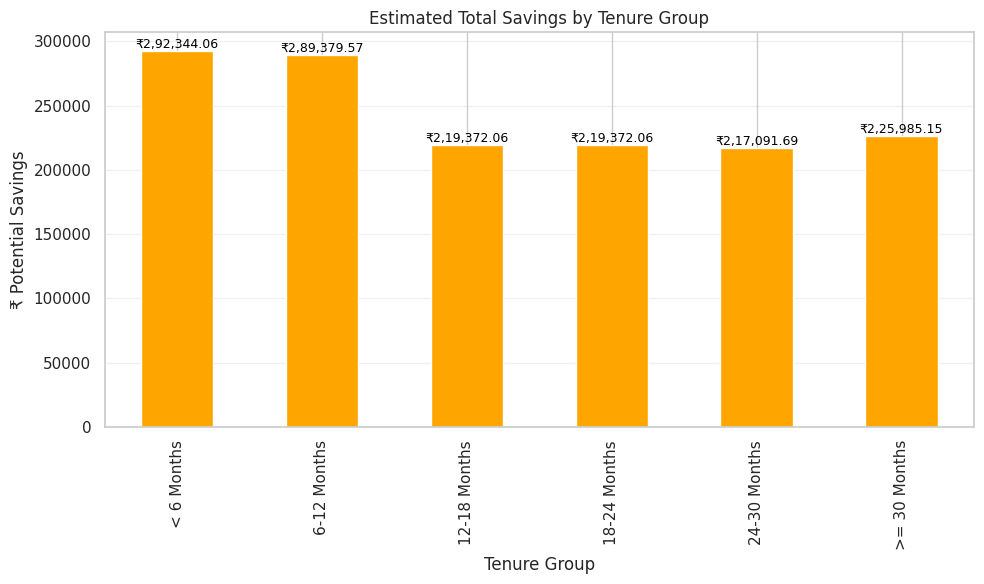

In [ ]:
import math

# --- Indian number formatter ---
def format_inr(x):
    """Format number in Indian grouping with two decimals, e.g. 227353.37 -> '2,27,353.37'"""
    if pd.isna(x): return ""
    x = abs(float(x))
    s_int = str(int(x))
    frac = f"{x - int(x):.2f}"[1:]
    if len(s_int) > 3:
        last3 = s_int[-3:]; rest = s_int[:-3]
        parts = []
        while len(rest) > 2:
            parts.append(rest[-2:]); rest = rest[:-2]
        if rest: parts.append(rest)
        grouped = ','.join(reversed(parts)) + ',' + last3
    else:
        grouped = s_int
    return grouped + frac

# --- Compute numeric estimated_savings (keep numeric for calculations/plotting) ---
avg_total_charge = df_encoded['Total_Charges'].mean()

savings_by_group_long = (
    df_encoded.groupby('Tenure_Months_Group')
              .size()
              .to_frame('count')
              .assign(retention_lift=lambda d: d.index.map(retention_lift_map).astype(float))
              .assign(estimated_savings=lambda d: avg_total_charge * d['count'] * d['retention_lift'])
)

# --- Add formatted strings for display without overwriting numeric column ---
savings_by_group_long = savings_by_group_long.assign(
    estimated_savings_inr=savings_by_group_long['estimated_savings'].apply(format_inr)
)

# --- Print table with Indian-format values ---
print("Estimated Total Savings by Tenure Group (group-specific lifts):")
for grp, row in savings_by_group_long.iterrows():
    print(f"{grp:<12} ₹{row['estimated_savings_inr']}")

total_numeric = savings_by_group_long['estimated_savings'].sum()
print(f"\nTotal Estimated Total Savings: ₹{format_inr(total_numeric)}")

# --- Plot numeric bars, annotate with Indian-format labels ---
plt.figure(figsize=(10, 6))
ax = savings_by_group_long['estimated_savings'].plot(kind='bar', color='orange')

plt.title("Estimated Total Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Annotate with Indian-format labels (use the formatted column)
for p, label in zip(ax.patches, savings_by_group_long['estimated_savings_inr']):
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"₹{label}",
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (56,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6637 - loss: 11.6520
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 1.1461
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 1.1956
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 1.4287
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.8845
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.8832
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 1.0259
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.9835
Epoch 9/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7610 - loss: 0.7676
Epoch 10/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 1.0513
Epoch 11/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7374 - loss: 1.5114
Epoch 12/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.6885


[0.7768880724906921, 0.8208722472190857]

In [ ]:
yp = model.predict(X_test)
yp[:5]

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.3662091e-01],
       [5.0989840e-08],
       [4.6099199e-06],
       [6.3693673e-10],
       [1.5718141e-04]], dtype=float32)

In [ ]:
y_test[:5]

,Customer_Status_Churned
3559,0
3426,0
5783,0
6367,0
3945,0


In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[891  74]
 [156 163]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       965
           1       0.69      0.51      0.59       319

    accuracy                           0.82      1284
   macro avg       0.77      0.72      0.74      1284
weighted avg       0.81      0.82      0.81      1284



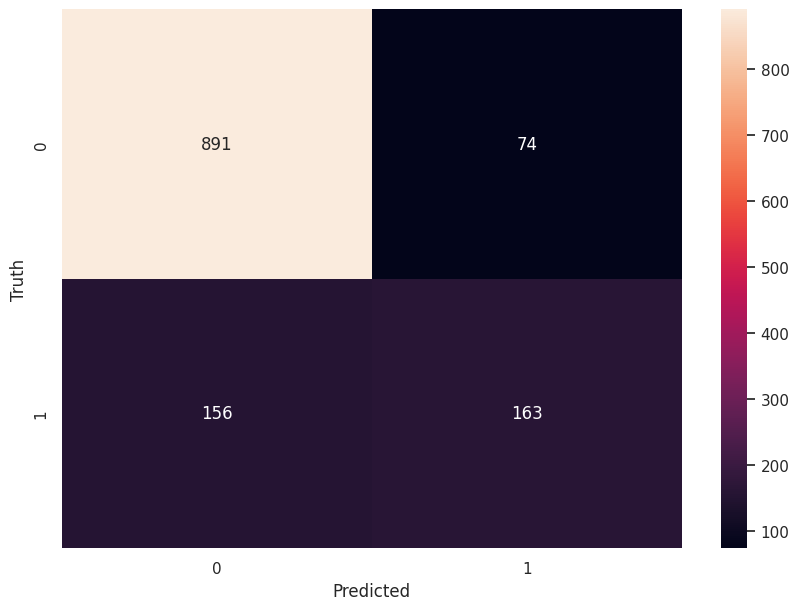

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
y_test.shape

(1284,)

In [ ]:
# Accuracy
print('Accuracy:', round((891+163)/(891+163+74+156),2))

Accuracy: 0.82


In [ ]:
# Precision for 0 class. i.e. Precision for customers who did not churn
print('0 Precision:',round(891/(891+156),2))

0 Precision: 0.85


In [ ]:
# Precision for 1 class. i.e. Precision for customers who did not churn
print('1 Precision:',round(163/(163+74),2))

1 Precision: 0.69


In [ ]:
# Recall for 0 class
print('0 Recall:',round(891/(891+74),2))

0 Recall: 0.92


In [ ]:
# Recall for 1 class
print('1 Recall:',round(163/(163+156),2))

1 Recall: 0.51


Scale Feature

In [ ]:
 # Scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)


Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)


XGBoost

In [ ]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:33:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# Models that need scaling
models_scaled = {"Logistic Regression": LogisticRegression(max_iter=5000)}

# Models that do NOT need scaling
models_unscaled = {"Random Forest": rf, "XGBoost": xgb}

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name} Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_lr_pred)
evaluate_model("Random Forest", y_test, y_rf_pred)
evaluate_model("XGBoost", y_test, y_xgb_pred)


📊 Logistic Regression Accuracy: 0.82
[[867  98]
 [130 189]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       965
           1       0.66      0.59      0.62       319

    accuracy                           0.82      1284
   macro avg       0.76      0.75      0.75      1284
weighted avg       0.82      0.82      0.82      1284

📊 Random Forest Accuracy: 0.83
[[891  74]
 [143 176]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       965
           1       0.70      0.55      0.62       319

    accuracy                           0.83      1284
   macro avg       0.78      0.74      0.76      1284
weighted avg       0.82      0.83      0.82      1284

📊 XGBoost Accuracy: 0.82
[[868  97]
 [138 181]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       965
           1       0.65      0.57      0.61       319

    accuracy        

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       965
           1       0.66      0.59      0.62       319

    accuracy                           0.82      1284
   macro avg       0.76      0.75      0.75      1284
weighted avg       0.82      0.82      0.82      1284

Logistic Regression Confusion Matrix:
[[867  98]
 [130 189]]
Logistic Regression AUC Score: 0.87
Logistic Regression Accuracy: 0.82
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       965
           1       0.70      0.55      0.62       319

    accuracy                           0.83      1284
   macro avg       0.78      0.74      0.76      1284
weighted avg       0.82      0.83      0.82      1284

Random Forest Confusion Matrix:
[[891  74]
 [143 176]]
Random Forest AUC Score: 0.86
Random Forest Accuracy: 0.83


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:33:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       965
           1       0.65      0.57      0.61       319

    accuracy                           0.82      1284
   macro avg       0.76      0.73      0.74      1284
weighted avg       0.81      0.82      0.81      1284

XGBoost Confusion Matrix:
[[868  97]
 [138 181]]
XGBoost AUC Score: 0.84
XGBoost Accuracy: 0.82


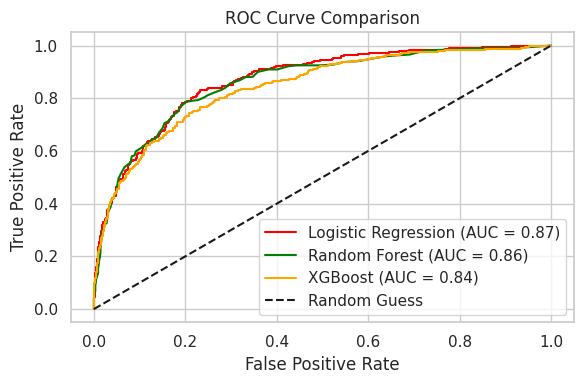

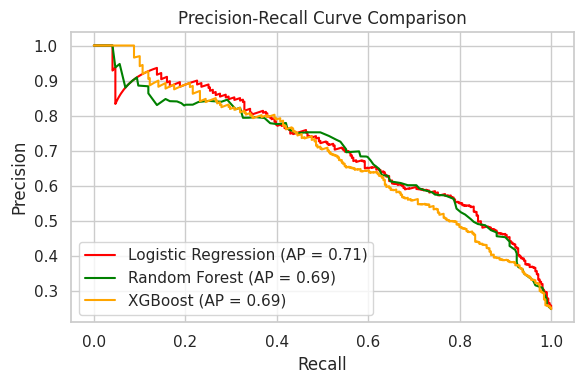

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score

# 🔹 Model Evaluation
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} AUC Score: {roc_auc:.2f}")
    print(f"{model_name} Accuracy: {model.score(X_test, y_test):.2f}")
    return model_name, roc_auc, accuracy_score(y_test, y_pred)

results = []

# Scaled models (Logistic Regression)
for name, model in models_scaled.items():
    results.append(train_and_evaluate(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name=name))

# Unscaled models (Random Forest, XGBoost)
for name, model in models_unscaled.items():
    results.append(train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name=name))

summary_df = pd.DataFrame(results, columns=["Model", "AUC", "Accuracy"])
summary_df.to_excel("model_comparison.xlsx", index=False)

# 🔹 Confusion Matrix Details
def get_confusion_details(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return pd.Series({
        "True Positives": tp,
        "False Positives": fp,
        "False Negatives": fn,
        "True Negatives": tn
    })

confusion_details = pd.DataFrame({
    "Logistic Regression": get_confusion_details(y_test, y_lr_pred),
    "Random Forest": get_confusion_details(y_test, y_rf_pred),
    "XGBoost": get_confusion_details(y_test, y_xgb_pred)
})
confusion_details.to_excel("confusion_breakdown.xlsx")

# 🔹 ROC Curves
# Logistic Regression
y_lr_prob = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_prob)
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
y_rf_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_prob)
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
y_xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_xgb_prob)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve_comparison.png")
plt.show()

# 🔹 Precision-Recall Curves
def plot_pr_curve(y_true, y_probs, label, color):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    avg_prec = average_precision_score(y_true, y_probs)
    plt.plot(recall, precision, label=f"{label} (AP = {avg_prec:.2f})", color=color)

plt.figure(figsize=(6, 4))
plot_pr_curve(y_test, y_lr_prob, "Logistic Regression", "red")
plot_pr_curve(y_test, y_rf_prob, "Random Forest", "green")
plot_pr_curve(y_test, y_xgb_prob, "XGBoost", "orange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig("precision_recall_curve.png")
plt.show()


AUC Scores:
Logistic Regression AUC: 0.87
Random Forest AUC: 0.86
XGBoost AUC: 0.84
Accuracy Scores:
Logistic Regression Accuracy: 0.82
Random Forest Accuracy: 0.83
XGBoost Accuracy: 0.82
Precision Scores:
Logistic Regression Precision: 0.66
Random Forest Precision: 0.70
XGBoost Precision: 0.65
Recall Scores:
Logistic Regression Recall: 0.59
Random Forest Recall: 0.55
XGBoost Recall: 0.57
F1 Scores:
Logistic Regression F1 Score: 0.62
Random Forest F1 Score: 0.62
XGBoost F1 Score: 0.61
Support:
Logistic Regression Support: 1284
Random Forest Support: 1284
XGBoost Support: 1284


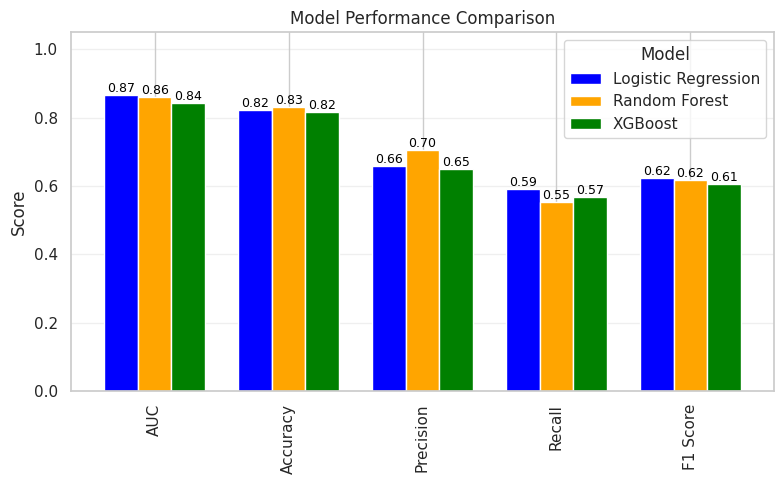

In [ ]:
# 🔹 AUC Scores
auc_lr = auc(*roc_curve(y_test, y_lr_prob)[:2])
auc_rf = auc(*roc_curve(y_test, y_rf_prob)[:2])
auc_xgb = auc(*roc_curve(y_test, y_xgb_prob)[:2])
print(f"AUC Scores:\nLogistic Regression AUC: {auc_lr:.2f}\nRandom Forest AUC: {auc_rf:.2f}\nXGBoost AUC: {auc_xgb:.2f}")

# 🔹 Accuracy Scores
acc_lr = accuracy_score(y_test, y_lr_pred)
acc_rf = accuracy_score(y_test, y_rf_pred)
acc_xgb = accuracy_score(y_test, y_xgb_pred)
print(f"Accuracy Scores:\nLogistic Regression Accuracy: {acc_lr:.2f}\nRandom Forest Accuracy: {acc_rf:.2f}\nXGBoost Accuracy: {acc_xgb:.2f}")

# 🔹 Precision Scores
prec_lr = precision_score(y_test, y_lr_pred)
prec_rf = precision_score(y_test, y_rf_pred)
prec_xgb = precision_score(y_test, y_xgb_pred)
print(f"Precision Scores:\nLogistic Regression Precision: {prec_lr:.2f}\nRandom Forest Precision: {prec_rf:.2f}\nXGBoost Precision: {prec_xgb:.2f}")

# 🔹 Recall Scores
rec_lr = recall_score(y_test, y_lr_pred)
rec_rf = recall_score(y_test, y_rf_pred)
rec_xgb = recall_score(y_test, y_xgb_pred)
print(f"Recall Scores:\nLogistic Regression Recall: {rec_lr:.2f}\nRandom Forest Recall: {rec_rf:.2f}\nXGBoost Recall: {rec_xgb:.2f}")

# 🔹 F1 Scores
f1_lr = f1_score(y_test, y_lr_pred)
f1_rf = f1_score(y_test, y_rf_pred)
f1_xgb = f1_score(y_test, y_xgb_pred)
print(f"F1 Scores:\nLogistic Regression F1 Score: {f1_lr:.2f}\nRandom Forest F1 Score: {f1_rf:.2f}\nXGBoost F1 Score: {f1_xgb:.2f}")

# 🔹 Support
support = len(y_test)
print(f"Support:\nLogistic Regression Support: {support}\nRandom Forest Support: {support}\nXGBoost Support: {support}")

# 🔹 Summary Table
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'AUC': [auc_lr, auc_rf, auc_xgb],
    'Accuracy': [acc_lr, acc_rf, acc_xgb],
    'Precision': [prec_lr, prec_rf, prec_xgb],
    'Recall': [rec_lr, rec_rf, rec_xgb],
    'F1 Score': [f1_lr, f1_rf, f1_xgb],
    'Support': [support, support, support]
})

# Transpose for plotting
summary_plot = summary.set_index('Model').T

# 🔹 Confusion Matrix Details
confusion_transposed = confusion_details.T.reset_index().rename(columns={'index': 'Model'})
merged_summary = pd.merge(summary, confusion_transposed, on='Model')

# Export to Excel
merged_summary.to_excel("merged_model_summary.xlsx", index=False)

# Assuming you already have 'performance_df' with model scores
ax = summary_plot.drop(index='Support').plot(kind='bar', figsize=(8, 5), width=0.75, color=['blue', 'orange', 'green'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)  # Add headroom for labels
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Add value labels to each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"{height:.2f}",  # Format to 2 decimal places
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.savefig("model_performance_bar_chart.png")
plt.show()


    Threshold  Precision    Recall        F1  Support
0        0.00   0.248442  1.000000  0.398004     1284
1        0.05   0.308983  0.981191  0.469970     1284
2        0.10   0.350058  0.940439  0.510204     1284
3        0.15   0.417021  0.921630  0.574219     1284
4        0.20   0.456169  0.880878  0.601070     1284
5        0.25   0.497186  0.830721  0.622066     1284
6        0.30   0.562780  0.786834  0.656209     1284
7        0.35   0.592689  0.711599  0.646724     1284
8        0.40   0.612426  0.648903  0.630137     1284
9        0.45   0.672474  0.605016  0.636964     1284
10       0.50   0.695652  0.551724  0.615385     1284
11       0.55   0.752381  0.495298  0.597353     1284
12       0.60   0.775758  0.401254  0.528926     1284
13       0.65   0.794118  0.338558  0.474725     1284
14       0.70   0.842105  0.250784  0.386473     1284
15       0.75   0.828947  0.197492  0.318987     1284
16       0.80   0.830189  0.137931  0.236559     1284
17       0.85   0.888889  0.

/tmp/ipython-input-4149891465.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


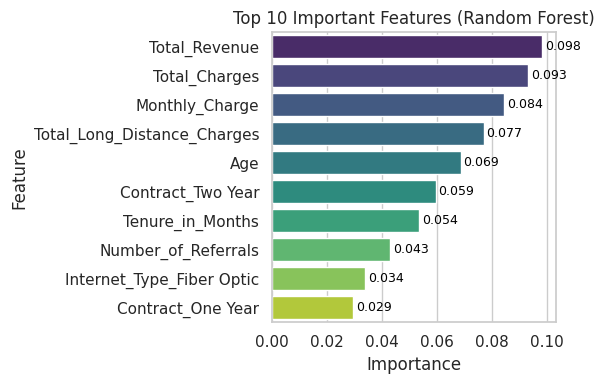

Top 10 Important Features:
                        Feature  Importance
22                Total_Revenue    0.098313
18                Total_Charges    0.093160
17               Monthly_Charge    0.084405
21  Total_Long_Distance_Charges    0.076943
1                           Age    0.068575
53            Contract_Two Year    0.059442
4              Tenure_in_Months    0.053542
3           Number_of_Referrals    0.042845
50    Internet_Type_Fiber Optic    0.033802
52            Contract_One Year    0.029393


In [ ]:
# 🔹 Threshold Analysis Table
def threshold_metrics(y_true, y_probs, thresholds=np.arange(0.0, 1.01, 0.05)):
    results = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        support = len(y_true)
        results.append((thresh, precision, recall, f1, support))

    df_thresh = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1", "Support"])
    df_thresh.to_excel("threshold_analysis.xlsx", index=False)
    return df_thresh

# Run for Random Forest (example)
threshold_df = threshold_metrics(y_test, y_rf_prob)
print(threshold_df)

# Train Random Forest on the original DataFrame (not scaled)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get feature names from the same DataFrame
features = X_train.columns

# Build DataFrame
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Top 10 features
top_features = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Add value labels to bars
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Top 10 Important Features:")
print(top_features)


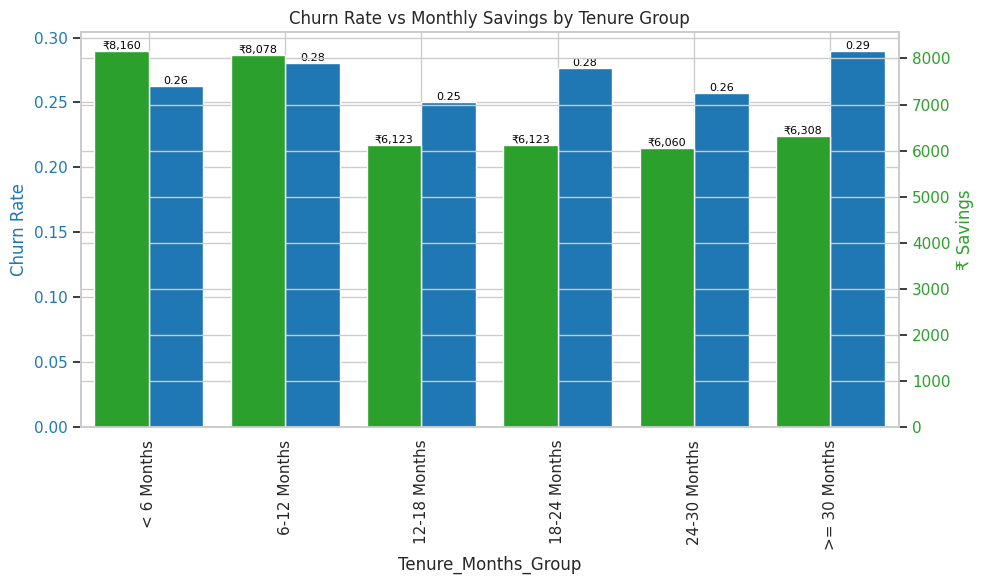

In [ ]:
# 🔹 Dual-axis plot: Churn Rate vs Savings
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left axis: Churn Rate ---
color = 'tab:blue'
ax1.set_xlabel('Tenure Group')
ax1.set_ylabel('Churn Rate', color=color)
segment_churn.plot(kind='bar', ax=ax1, color=color, position=0, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(-0.5, len(segment_churn) - 0.5)

# --- Right axis: Savings ---
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('₹ Savings', color=color)
savings_by_group['estimated_savings'].plot(kind='bar', ax=ax2, color=color, position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(-0.5, len(savings_by_group) - 0.5)

plt.title("Churn Rate vs Monthly Savings by Tenure Group")
plt.tight_layout()

# Add value labels for churn rate bars (ax1)
for p in ax1.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"{height:.2f}",   # 2 decimal places for churn rate
            ha='center', va='bottom',
            fontsize=8, color='black'
        )

# Add value labels for savings bars (ax2)
for p in ax2.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax2.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"₹{height:,.0f}",  # Currency formatting with commas
            ha='center', va='bottom',
            fontsize=8, color='black'
        )

plt.show()


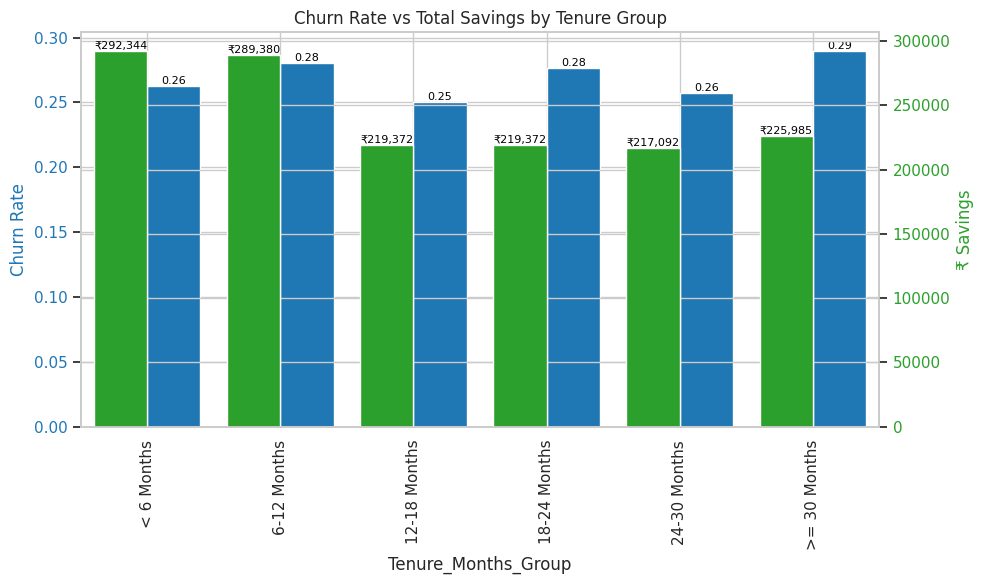

In [ ]:
# 🔹 Dual-axis plot: Churn Rate vs Savings
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left axis: Churn Rate ---
color = 'tab:blue'
ax1.set_xlabel('Tenure Group')
ax1.set_ylabel('Churn Rate', color=color)
segment_churn.plot(kind='bar', ax=ax1, color=color, position=0, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(-0.5, len(segment_churn) - 0.5)

# --- Right axis: Savings ---
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('₹ Savings', color=color)
savings_by_group_long['estimated_savings'].plot(kind='bar', ax=ax2, color=color, position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(-0.5, len(savings_by_group_long) - 0.5)

plt.title("Churn Rate vs Total Savings by Tenure Group")
plt.tight_layout()

# Add value labels for churn rate bars (ax1)
for p in ax1.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"{height:.2f}",   # 2 decimal places for churn rate
            ha='center', va='bottom',
            fontsize=8, color='black'
        )

# Add value labels for savings bars (ax2)
for p in ax2.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        ax2.text(
            p.get_x() + p.get_width() / 2,
            height,
            f"₹{height:,.0f}",  # Currency formatting with commas
            ha='center', va='bottom',
            fontsize=8, color='black'
        )

plt.show()


     TenureGroup RetentionRate MonthlyChargeSavings TotalChargeSavings
0     < 6 Months            5%             ₹4080.15         ₹146172.03
1    6-12 Months            5%             ₹4038.77         ₹144689.78
2   12-18 Months            5%             ₹3061.70         ₹109686.03
3   18-24 Months            5%             ₹3061.70         ₹109686.03
4   24-30 Months            5%             ₹3029.88         ₹108545.84
5   >= 30 Months            5%             ₹3154.00         ₹112992.57
6     < 6 Months           10%             ₹8160.30         ₹292344.06
7    6-12 Months           10%             ₹8077.55         ₹289379.57
8   12-18 Months           10%             ₹6123.41         ₹219372.06
9   18-24 Months           10%             ₹6123.41         ₹219372.06
10  24-30 Months           10%             ₹6059.75         ₹217091.69
11  >= 30 Months           10%             ₹6308.00         ₹225985.15
12    < 6 Months           15%            ₹12240.45         ₹438516.09
13   6

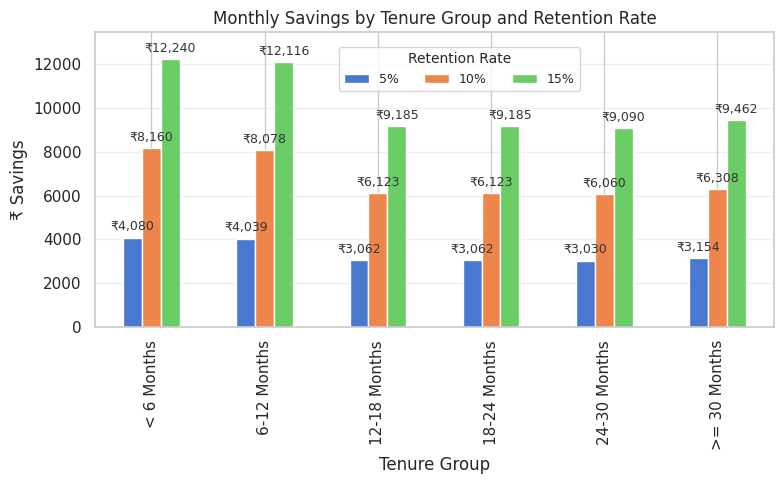

In [ ]:
# 🔹 Combined Savings Table
avg_monthly = df_encoded['Monthly_Charge'].mean()
avg_total = df_encoded['Total_Charges'].mean()
retention_rates = [0.05, 0.10, 0.15]
tenure_order = ['< 6 Months', '6-12 Months', '12-18 Months',
                '18-24 Months', '24-30 Months', '>= 30 Months']

combined_rows = []
for rate in retention_rates:
    for group in tenure_order:
        group_size = df_encoded[df_encoded['Tenure_Months_Group'] == group].shape[0]
        if group_size > 0:
            monthly_savings = avg_monthly * group_size * rate
            total_savings = avg_total * group_size * rate
            combined_rows.append({
                'TenureGroup': group,
                'RetentionRate': f'{int(rate*100)}%',
                'MonthlyChargeSavings': f'₹{monthly_savings:.2f}',
                'TotalChargeSavings': f'₹{total_savings:.2f}'
            })
        else:
            combined_rows.append({
                'TenureGroup': group,
                'RetentionRate': f'{int(rate*100)}%',
                'MonthlyChargeSavings': 'No customers in this group',
                'TotalChargeSavings': 'No customers in this group'
            })

combined_df = pd.DataFrame(combined_rows)
print(combined_df)
combined_df.to_excel("combined_savings_summary.xlsx", index=False)

# Convert savings columns to numeric for plotting
combined_df['MonthlyChargeSavings'] = combined_df['MonthlyChargeSavings'].replace('[₹,]', '', regex=True).replace('No customers in this group', 0).astype(float)
combined_df['TotalChargeSavings'] = combined_df['TotalChargeSavings'].replace('[₹,]', '', regex=True).replace('No customers in this group', 0).astype(float)

# Pivot for grouped bar chart
pivot_df = combined_df.pivot(index='TenureGroup', columns='RetentionRate', values='MonthlyChargeSavings')

# Desired retention rate order
retention_order = ['5%', '10%', '15%']
pivot_df = pivot_df[retention_order]

# Reorder rows to match tenure progression
pivot_df = pivot_df.reindex(tenure_order)

# Plot
ax = pivot_df.plot(kind='bar', figsize=(8, 5))
plt.title("Monthly Savings by Tenure Group and Retention Rate")
plt.ylabel("₹ Savings")
plt.xlabel("Tenure Group")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        # Format with ₹ and thousands separator
        label = f"₹{height:,.0f}"
        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            xytext=(0, 3), textcoords='offset points',
            fontsize=9, rotation=0, color='#333'
        )

ax.legend(
    title='Retention Rate',
    ncol=3,  # three entries in one row
    loc='upper left',
    bbox_to_anchor=(0.35, 0.97),  # adjust position inside plot
    bbox_transform=ax.transAxes,
    frameon=True,
    fontsize=9,
    title_fontsize=10
)

plt.savefig("monthly_savings_grouped_bar_chart.png")
# Increase top edge by 5% above the tallest bar
max_height = pivot_df.max().max()
ax.set_ylim(0, max_height * 1.10)
plt.show()


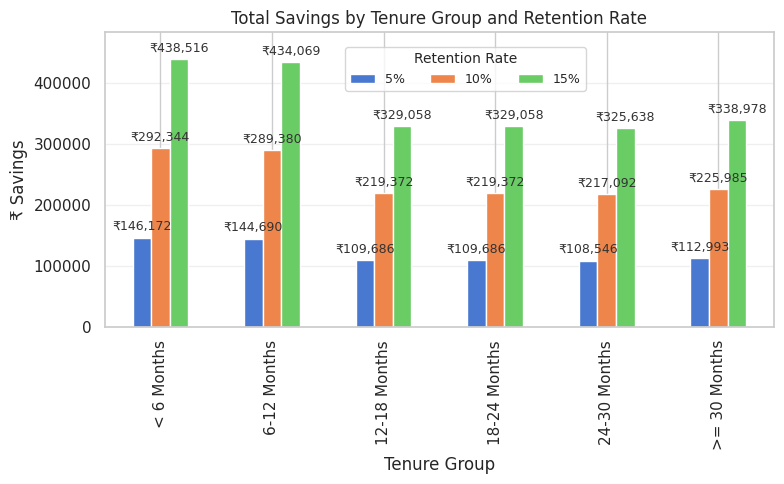

In [ ]:
# Pivot for grouped bar chart
pivot_df = combined_df.pivot(index='TenureGroup', columns='RetentionRate', values='TotalChargeSavings')

# Reorder rows to match tenure progression
pivot_df = pivot_df.reindex(tenure_order)

# Desired retention rate order
retention_order = ['5%', '10%', '15%']
pivot_df = pivot_df[retention_order]

# Plot
ax = pivot_df.plot(kind='bar', figsize=(8, 5))
plt.title("Total Savings by Tenure Group and Retention Rate")
plt.ylabel("₹ Savings")
plt.xlabel("Tenure Group")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height != 0:
        # Format with ₹ and thousands separator
        label = f"₹{height:,.0f}"
        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom',
            xytext=(0, 3), textcoords='offset points',
            fontsize=9, rotation=0, color='#333'
        )

ax.legend(
    title='Retention Rate',
    ncol=3,  # three entries in one row
    loc='upper left',
    bbox_to_anchor=(0.35, 0.97),  # adjust position inside plot
    bbox_transform=ax.transAxes,
    frameon=True,
    fontsize=9,
    title_fontsize=10
)


plt.savefig("total_savings_grouped_bar_chart.png")
# Increase top edge by 5% above the tallest bar
max_height = pivot_df.max().max()
ax.set_ylim(0, max_height * 1.10)
plt.show()

Tenure Months Group  MonthlyCharge-Based Savings  TotalCharge-Based Savings
< 6 Months                ₹8,160.30                  ₹2,92,344.06
6-12 Months               ₹8,077.55                  ₹2,89,379.57
12-18 Months              ₹6,123.41                  ₹2,19,372.06
18-24 Months              ₹6,123.41                  ₹2,19,372.06
24-30 Months              ₹6,059.75                  ₹2,17,091.69
>= 30 Months              ₹6,307.00                  ₹2,25,985.15


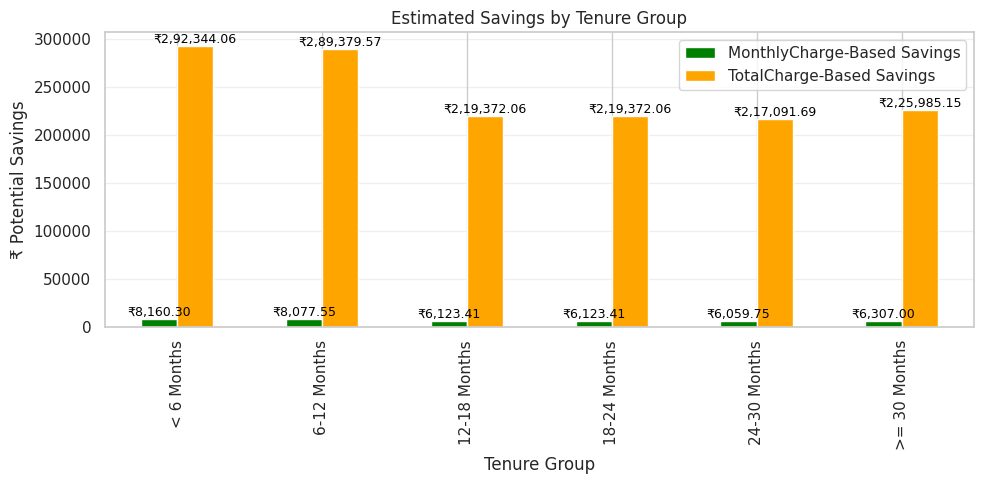

In [ ]:
# 🔹 Revenue Impact Estimate
# ensure both are Series containing the numeric savings (same index)
mc_savings = savings_by_group['estimated_savings']            # Series
tc_savings = savings_by_group_long['estimated_savings']      # Series

# optional: reindex to a consistent order (use tenure_order if you have one)
tenure_order = ['< 6 Months','6-12 Months','12-18 Months','18-24 Months','24-30 Months','>= 30 Months']
mc_savings = mc_savings.reindex(tenure_order)
tc_savings = tc_savings.reindex(tenure_order)

# combine into one DataFrame
savings_df = pd.DataFrame({
    'MonthlyCharge-Based Savings': mc_savings,
    'TotalCharge-Based Savings': tc_savings
})

# Add formatted columns (keeps numeric columns for calculations/plots)
savings_df = savings_df.copy()
savings_df['TotalCharge-Based Savings (INR)'] = savings_df['TotalCharge-Based Savings'].apply(format_inr)
savings_df['MonthlyCharge-Based Savings (INR)'] = savings_df['MonthlyCharge-Based Savings'].apply(format_inr)

# Print table showing Indian format for the totals
print("Tenure Months Group  MonthlyCharge-Based Savings  TotalCharge-Based Savings")
for idx, row in savings_df.iterrows():
    print(f"{idx:<12}              ₹{row['MonthlyCharge-Based Savings (INR)']}                  ₹{row['TotalCharge-Based Savings (INR)']}")

# Optional: plot numeric bars and annotate using formatted strings
ax = savings_df[['MonthlyCharge-Based Savings','TotalCharge-Based Savings']].plot(
    kind='bar', figsize=(10,5), color=['green','orange']
)
plt.title("Estimated Savings by Tenure Group")
plt.ylabel("₹ Potential Savings")
plt.xlabel("Tenure Group")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

# Annotate bars with Indian-format labels (two decimals)
n_rows = len(savings_df)
for i, p in enumerate(ax.patches):
    col_idx = i // n_rows
    row_idx = i % n_rows
    val = savings_df.iloc[row_idx, col_idx]             # numeric value
    if np.isnan(val) or val == 0:
        continue
    # pick formatted label matching column
    if col_idx == 0:
        label = savings_df['MonthlyCharge-Based Savings (INR)'].iloc[row_idx]
    else:
        label = savings_df['TotalCharge-Based Savings (INR)'].iloc[row_idx]
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"₹{label}",
        ha='center', va='bottom', fontsize=9, color='black'
    )

plt.show()